# Visualising Experiment 1 b

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname as dirname
import os
import numpy as np
from scipy import stats
import datetime
from math import sqrt
def sharpe(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)-risk_free
    mu_excess_returns = excess_returns.mean()
    sigma_excess_returns = excess_returns.std()
    if mu_excess_returns < 0:
        return -sqrt(abs(mu_excess_returns)/sigma_excess_returns)
    else:
        return sqrt(mu_excess_returns/sigma_excess_returns)
def cagr(returns):
    return returns.iloc[-1]**(365.25/((returns.index.max()-returns.index.min()).days))-1
def max_drawdown(returns,years=None):
    if years is not None:
        returns = np.array(returns[returns.index>(returns.index.max()-datetime.timedelta(days=365*years))])
    return np.max((1-returns/np.maximum.accumulate(returns))) # end of the period
def calmar(returns):
    return cagr(returns)/max_drawdown(returns)
def ci_mean(x,confidence=0.95):
    x = np.array(x)
    return stats.norm.interval(confidence, loc=x.mean(), scale=x.std()/sqrt(len(x)))
def ci_mean_diff(x,x_base,confidence=0.95):
    diff = np.array(x)-np.array(x_base)
    return ci_mean(diff,confidence=confidence)
def sortino(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)-risk_free
    mu_excess_returns = excess_returns.mean()
    sigma_excess_returns_negative = excess_returns[excess_returns<0].std()
    if mu_excess_returns < 0:
        return -sqrt(abs(mu_excess_returns)/sigma_excess_returns_negative)
    else:
        return sqrt(mu_excess_returns/sigma_excess_returns_negative)
def mean_upside(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)/risk_free-1
    mu_excess_returns = excess_returns.mean()
    return mu_excess_returns
def std_upside(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)/risk_free-1
    sigma_excess_returns = excess_returns.std()
    return sigma_excess_returns

In [20]:
np.random.seed(1)
all_groups = [['C', 'JPM', 'TCF', 'UMBF'], ['PFE', 'JNJ', 'ABT', 'BMY'], ['INTC', 'XLNX', 'KOPN', 'MXIM'],
			  ['MCD', 'EAT', 'JACK', 'PZZA'], ['LH', 'AMS', 'DGX', 'PMD'], ['COHR', 'PKI', 'BIO', 'WAT'],
			  ['MMM', 'TFX', 'CRY', 'ATRI'], ['TRT', 'IVAC', 'ASYS', 'VECO'], ['GGG', 'FLS', 'ITT', 'IEX'],
			  ['AVX', 'HUBB', 'IIN', 'MRCY'], ['FLEX', 'CTS', 'IEC', 'SANM'], ['HDSN', 'KAMN', 'LAWS', 'WLFC'],
			  ['CIA', 'AAME', 'FFG', 'GL'], ['CIGI', 'FRPH', 'CTO', 'TRC'], ['NBIX', 'BCRX', 'TECH', 'TTNP'],
			  ['SCON', 'MSI', 'BKTI', 'VSAT'], ['LECO', 'CVR', 'SPXC', 'PFIN'], ['STRM', 'EBIX', 'UIS', 'JKHY'],
			  ['UVV', 'STKL', 'ANDE', 'PYX'], ['BZH', 'NVR', 'PHM', 'MTH'], ['MOD', 'DORM', 'STRT', 'SUP'],
			  ['PCAR', 'SPAR', 'F', 'OSK'], ['HLX', 'CLB', 'ENSV', 'RES'], ['BCPC', 'FMC', 'GRA', 'OLN']]
all_sectors = ['National Commercial Banks', 'Pharmaceutical Preparations', 'Semiconductors and Related Devices', 
               'Retail-Eating Places', 'Services-Medical Laboratories', 'Laboratory Analytical Instruments', 
               'Surgical and Medical Instruments and Apparatus', 'Special Industry Machinery, Not Elsewhere Classified', 'Pumps and Pumping Equipment', 
               'Electronic Components And Accessories', 'Printed Circuit Boards', 'Wholesale-Machinery, Equipment and Supplies', 
               'Life Insurance', 'Real estate', 'Biological Products, (No Diagnostic Substances)', 
               'Radio and Television Broadcasting and Communications Equipment', 'Metalworkg Machinery and Equipment', 'Services-Computer Integrated Systems Design', 
               'Wholesale-Farm Product Raw Materials', 'Operative Builders', 'Motor Vehicle Parts and Accessories', 
               'Motor Vehicles and Passenger Car Bodies', 'Oil and Gas Field Services, Not Elsewhere Classified', 'Chemicals and Allied Products']

all_permutations = []
group_count = 3
group_size = len(all_groups[0])

groups = all_groups
while len(all_permutations) < 110:
	gs_i = np.random.choice(range(len(groups)),size=group_count,replace=False)
	gs = [groups[i] for i in gs_i]

	groups = [groups[i] for i in range(len(groups)) if i not in gs_i]
	if groups == []:
		groups = all_groups
	permutation = [np.random.permutation(x).tolist() for x in gs]
	permutation = np.random.permutation(permutation).tolist()
	if permutation not in all_permutations:
		all_permutations.append(permutation)
        
def find_sector(group):
    for i in range(len(all_groups)):
        if group[0] in all_groups[i]:
            break
    return all_sectors[i]

def includes_sector(sectors,run):
    for sector in sectors:
        for group in run:
            if find_sector(group) == sector:
                return True
    return False

## 1) Load Experiment 1 b results

In [87]:
#test_name="transaction_cost_test_{}"
test_name="final_base_agent_transaction_costs_{}"
group_size = 4
n_logs = 1
log_start_index = 0
n_groups = 2
group_start_index = 0
all_data = []
for j in range(group_start_index,group_start_index+n_groups):
    subset = []
    for i in range(n_logs):
        data = pd.read_csv("{}_log_{}_group_{}.csv".format(test_name,str(i+log_start_index),str(j)),parse_dates=['Date',]).set_index('Date',drop=False)
        subset.append(data)
    all_data.append(subset)
data = all_data[0][0]

## 2) Calculate statistics

In [88]:
d = data.set_index('Date')
base_sharpes = []
base_sortinos = []
base_cagrs = []
base_calmars = []
base_mdds = []
sharpes = []
sortinos = []
relative_sharpes = []
relative_sortinos = []
mean_upsides = []
std_upsides = []
cagrs = []
calmars = []
mdds = []
for ds in all_data:
    for d in ds:
        d = d.set_index('Date')
        sharpes.append(sharpe(d['Profit']))
        sortinos.append(sortino(d['Profit']))
        relative_sharpes.append(sharpe(d['Profit'],d['Base Profit']))
        relative_sortinos.append(sortino(d['Profit'],d['Base Profit']))
        mean_upsides.append(mean_upside(d['Profit'],d['Base Profit']))
        std_upsides.append(std_upside(d['Profit'],d['Base Profit']))
        calmars.append(calmar(d['Profit']))
        cagrs.append(cagr(d['Profit']))
        mdds.append(max_drawdown(d['Profit']))
        base_sharpes.append(sharpe(d['Base Profit']))
        base_sortinos.append(sortino(d['Base Profit']))
        base_calmars.append(calmar(d['Base Profit']))
        base_cagrs.append(cagr(d['Base Profit']))
        base_mdds.append(max_drawdown(d['Base Profit']))

draw_zone_sharpe = 1.0
draw_zone_sortino = 2.0
print("Sharpe win-ratio: {}%".format(round((np.array(relative_sharpes)>=draw_zone_sharpe).sum()/len(relative_sharpes)*100,2)))
print("Sharpe draw-ratio: {}%".format(round(((np.array(relative_sharpes)>0) & (np.array(relative_sharpes)<draw_zone_sharpe)).sum()/len(relative_sharpes)*100,2)))
print("Sharpe loss-ratio: {}%".format(round((np.array(relative_sharpes)<=0).sum()/len(relative_sharpes)*100,2)))
print("Relative Sharpe CI: {}".format(ci_mean(relative_sharpes)))

#print("Sortino win-ratio: {}%".format(round((np.array(relative_sortinos)>=draw_zone_sortino).sum()/len(relative_sortinos)*100,2)))
#print("Sortino draw-ratio: {}%".format(round(((np.array(relative_sortinos)>0) & (np.array(relative_sortinos)<draw_zone_sortino)).sum()/len(relative_sortinos)*100,2)))
#print("Sortino loss-ratio: {}%".format(round((np.array(relative_sortinos)<=0).sum()/len(relative_sortinos)*100,2)))
#print("Relative Sortino CI: {}".format(ci_mean(relative_sortinos)))
print("Sharpe CI: {}".format(ci_mean(sharpes)))
#print("Sortino CI: {}".format(ci_mean(sortinos)))
print("Calmar CI: {}".format(ci_mean(calmars)))
print("CAGR CI: {}".format(ci_mean(cagrs)))
print("MDD CI: {}".format(ci_mean(mdds)))
print("Sharpe difference CI: {}".format(ci_mean_diff(sharpes,base_sharpes)))
print("Calmar difference CI: {}".format(ci_mean_diff(calmars,base_calmars)))
print("CAGR difference CI: {}".format(ci_mean_diff(cagrs,base_cagrs)))
print("MDD difference CI: {}".format(ci_mean_diff(mdds,base_mdds)))
print("Mean upside CI: {}".format(ci_mean(mean_upsides)))
print("Standard deviation upside CI: {}".format(ci_mean(std_upsides)))


Sharpe win-ratio: 0.0%
Sharpe draw-ratio: 0.0%
Sharpe loss-ratio: 100.0%
Relative Sharpe CI: (-1.532630263319823, -0.9344360845889965)
Sharpe CI: (-1.8043872937341332, -0.18122098258664798)
Calmar CI: (-0.4523593529112592, 0.12491396073385025)
CAGR CI: (-0.41610904329228204, 0.08058638937487386)
MDD CI: (0.12626018823569335, 1.0631454160868834)
Sharpe difference CI: (-2.5714438169664784, -1.0952758985899398)
Calmar difference CI: (-0.5245456221137593, 0.0014623747553398347)
CAGR difference CI: (-0.43731836717934236, 0.05504441660371043)
MDD difference CI: (-0.07646074811880899, 0.7764763244642324)
Mean upside CI: (-0.7757826655426142, 0.06836071889279483)
Standard deviation upside CI: (0.005015665933377655, 0.3073669228729563)


## 3) Plot statistics

### 3.1) Relative Sharpe distribution

#### Plot for all runs

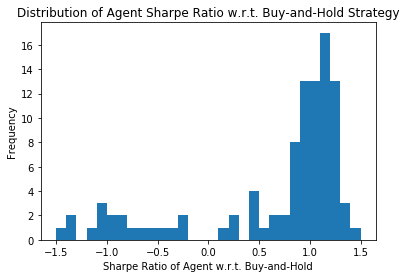

In [151]:
l = relative_sharpes
plt.title("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
plt.hist(l,bins=30,range=(-1.5,1.5))
plt.ylabel("Frequency")
plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
plt.show()

#### Plot per industry

In [25]:
l = relative_sharpes
industries = {k:[] for k in all_sectors}
for i in range(len(all_data)):
    for j in range(group_count):
        industries[find_sector(all_permutations[i][j])].append(l[i])

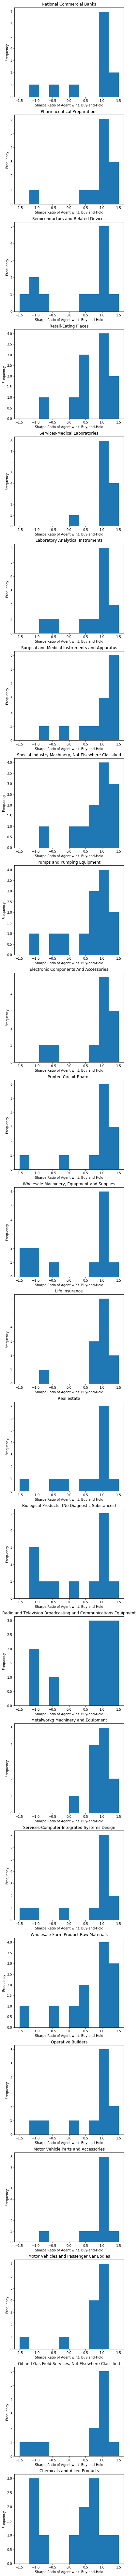

In [61]:
fig, axs = plt.subplots(len(all_sectors),figsize=(6,6*len(all_sectors)))
#fig.suptitle("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
for i in range(len(all_sectors)):
    axs[i].set_title(all_sectors[i])
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
    axs[i].hist(industries[all_sectors[i]],bins=10,range=(-1.5,1.5))

#### Analyse plots
Suspect industries:
- Semiconductors and Related Devices
- Wholesale-Machinery, Equipment and Supplies
- Biological Products, (No Diagnostic Substances)
- Chemicals and Allied Products

#### Plot for all runs except for those with suspect industries

In [56]:
suspects = ['Semiconductors and Related Devices','Wholesale-Machinery, Equipment and Supplies',
            'Biological Products, (No Diagnostic Substances)','Chemicals and Allied Products']
suspects = ['Semiconductors and Related Devices', 'Biological Products, (No Diagnostic Substances)']
print([all_groups[all_sectors.index(s)] for s in suspects])

[['INTC', 'XLNX', 'KOPN', 'MXIM'], ['NBIX', 'BCRX', 'TECH', 'TTNP']]


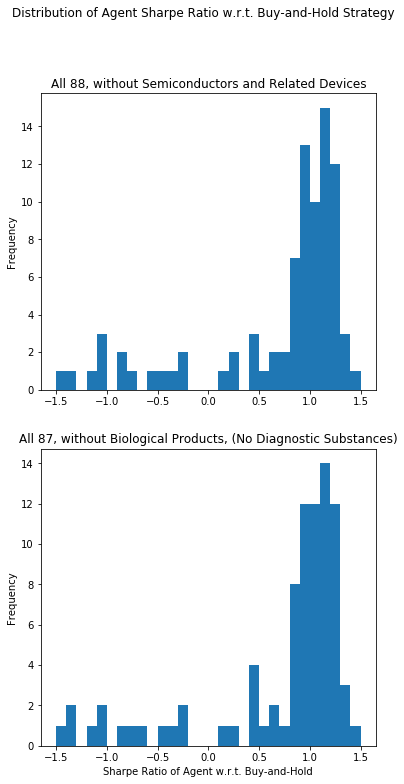

In [57]:
fig, axs = plt.subplots(len(suspects),figsize=(6,6*len(suspects)))
fig.suptitle("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
for i in range(len(suspects)):
    select_runs = [j for j in range(len(all_data)) if not includes_sector([suspects[i],],all_permutations[j])]
    select_l = [l[j] for j in select_runs]
    axs[i].set_title("All {}, without {}".format(len(select_runs),suspects[i]))
    axs[i].set_ylabel("Frequency")
    plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
    axs[i].hist(select_l,bins=30,range=(-1.5,1.5))

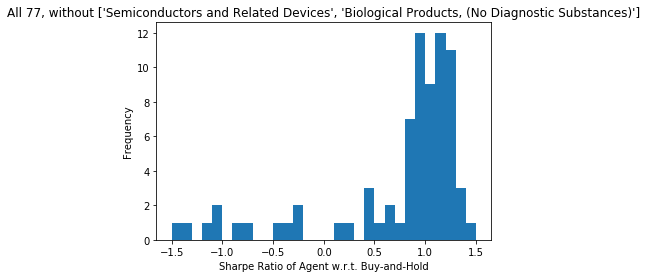

In [58]:
select_runs = [j for j in range(len(all_data)) if not includes_sector(suspects,all_permutations[j])]
select_l = [l[j] for j in select_runs]
plt.title("All {}, without {}".format(len(select_runs),suspects))
plt.hist(select_l,bins=30,range=(-1.5,1.5))
plt.ylabel("Frequency")
plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
plt.show()

In [59]:
print("Win-ratio: {}%".format(round((np.array(select_l)>=draw_zone).sum()/len(select_l)*100,2)))
print("Draw-ratio: {}%".format(round(((np.array(select_l)>0) & (np.array(select_l)<draw_zone)).sum()/len(select_l)*100,2)))
print("Loss-ratio: {}%".format(round((np.array(select_l)<=0).sum()/len(select_l)*100,2)))


Win-ratio: 49.35%
Draw-ratio: 36.36%
Loss-ratio: 14.29%


### 3.2) Plot Mean Relative Upside distribution and Std Relative Upside distribution

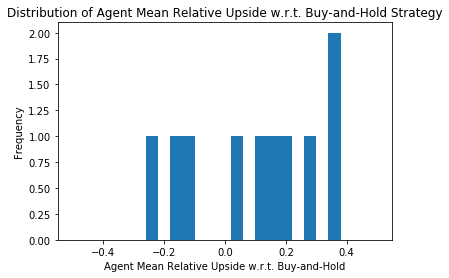

In [25]:
l = mean_upsides
plt.title("Distribution of Agent Mean Relative Upside w.r.t. Buy-and-Hold Strategy")
plt.hist(l,bins=25,range=(-0.5,0.5))
plt.ylabel("Frequency")
plt.xlabel("Agent Mean Relative Upside w.r.t. Buy-and-Hold")
plt.show()

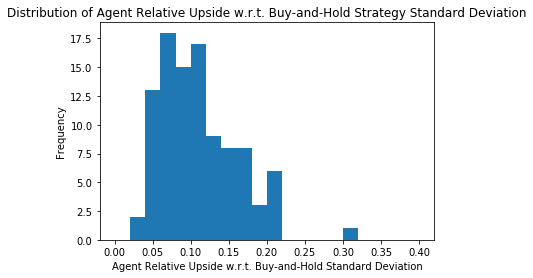

In [115]:
l = std_upsides
plt.title("Distribution of Agent Relative Upside w.r.t. Buy-and-Hold Strategy Standard Deviation")
plt.hist(l,bins=20,range=(0.0,0.4))
plt.ylabel("Frequency")
plt.xlabel("Agent Relative Upside w.r.t. Buy-and-Hold Standard Deviation")
plt.show()

## 4) Analyse portfolios

In [68]:
run_index = 2
data = all_data[run_index][0]
tickers = data.columns[6:]

### 4.1) Calculate average turnover

In [89]:
def turnover(portfolio):
    return portfolio['Volume'].sum()
volumes = [turnover(d) for run in all_data for d in run]
avg_volume = sum(volumes)/len(volumes)
print("Turnovers: {}".format(volumes))
print("Average turnover: {}".format(round(avg_volume,2)))
print("Transaction costs: {}".format(round(avg_volume*0.01,4)))

Turnovers: [34.01633462558188, 45.28888807805583]
Average turnover: 39.65
Transaction costs: 0.3965


### 4.2) Plot portfolio profit

Text(0, 0.5, 'Profit')

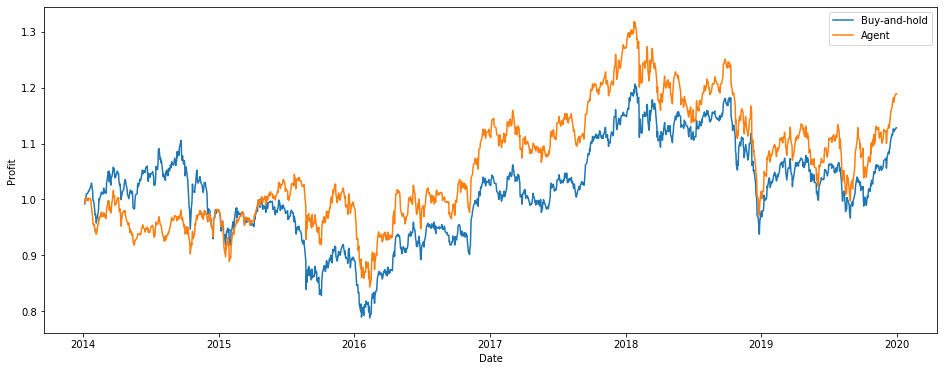

In [70]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=data.Date,y=data['Base Profit'])
sns.lineplot(x=data.Date,y=data['Profit'])
plt.legend(['Buy-and-hold',"Agent"])
plt.ylabel("Profit")

### 4.3) Plot portfolio weights

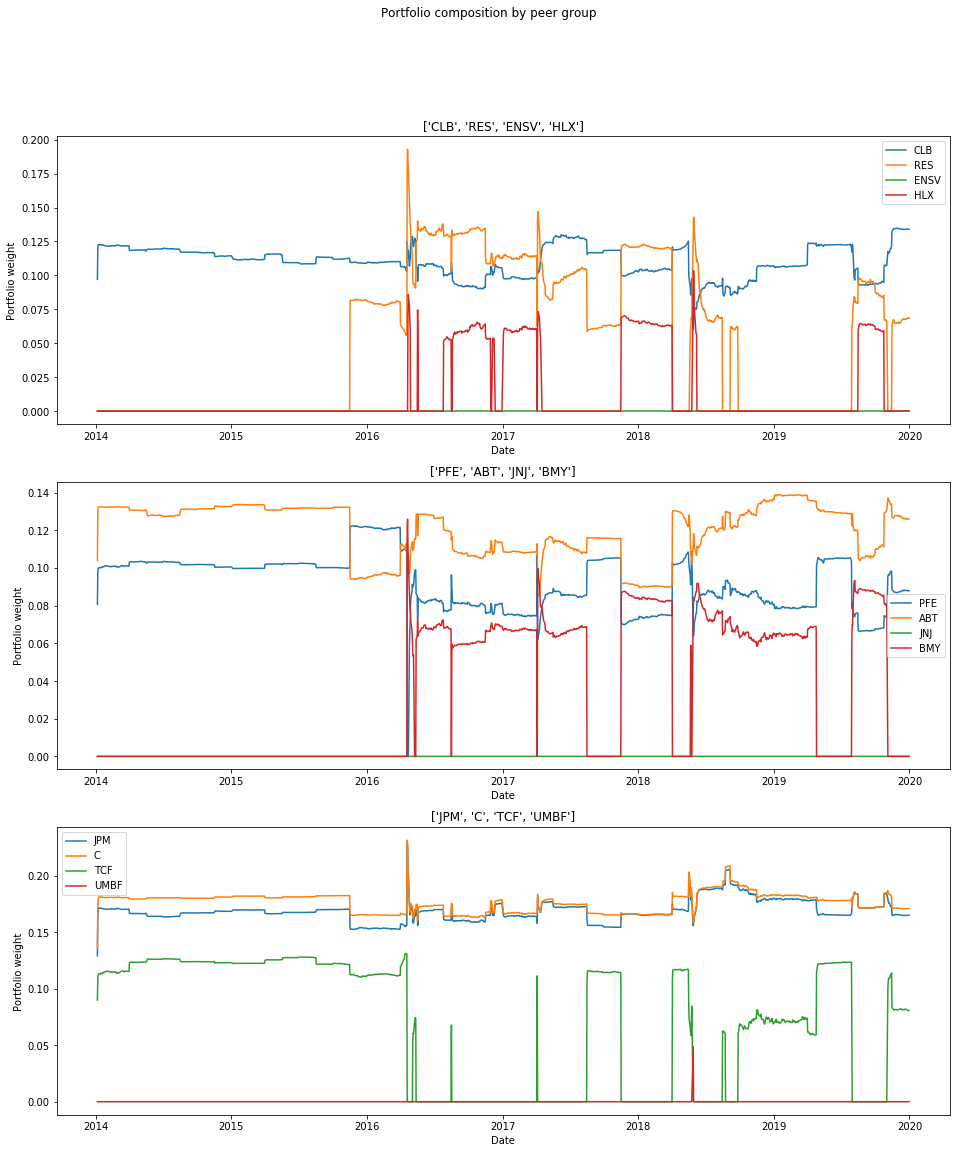

In [74]:
fig, axs = plt.subplots(max(len(tickers)//group_size,2),figsize=(16,6*max(len(tickers)//group_size,2)))
fig.suptitle("Portfolio composition by peer group")
for i in range(len(tickers)//group_size):
    ts = tickers[i*group_size:(i+1)*group_size]
    for ticker in ts:
        sns.lineplot(x=data.Date,y=data[ticker],ax=axs[i])
        
    axs[i].set_title(str(list(ts)))
    axs[i].legend(ts)
    axs[i].set_ylabel("Portfolio weight")

### 4.4) Plot volume

Text(0, 0.5, 'Daily Volume')

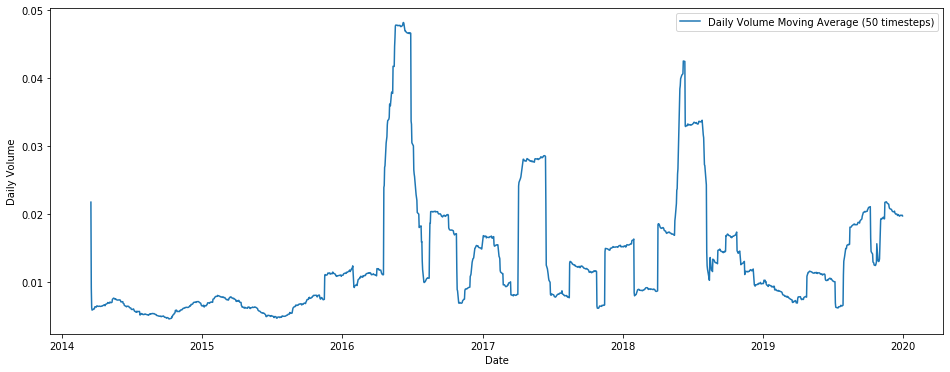

In [76]:
plt.figure(figsize=(16, 6))
#sns.lineplot(x=data.Date,y=data['Volume'])
sns.lineplot(x=data.Date,y=data['Volume'].rolling(50).mean())
plt.legend(["Daily Volume Moving Average (50 timesteps)"])
plt.ylabel("Daily Volume")

## 5) Conclusies
We kunnen concluderen dat:
- het oude model niet in staat is om de baseline te outperformen in het geval van transactiekosten
- het oude model er niet in slaagt haar gedrag aan te passen wanneer de huidige gewichtsvector als input wordt meegegeven, maar wel wanneer die vector een tweede maal, dieper in het netwerk wordt meegegeven
- het aangepaste model er niet in slaagt het transactievolume voldoende te doen afnemen in het geval van hogere transactiekosten (toon in een grafiek hoe het gemiddelde volume afneemt met toenemende transactiekosten)
- het aangepaste model kan gedwongen worden voldoende rekening te houden met transactiekosten, door bij het trainen de transactiekosten veel hoger te zetten dan bij het testen (5% vs 1%)